In [123]:
import numpy as np

class SVM:

    def __init__(self, learning_rate=0.01, lambda_param=0.001, n_iters=3000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_= np.where(y <= 0, -1, 1)


        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

In [125]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [127]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [128]:
df.shape

(768, 9)

In [129]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [130]:
df = df.sample(frac=1, random_state=1234).reset_index(drop=True)
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X = (X - X.mean()) / X.std()
X = X.values
y = y.values
y = np.where(y == 0, -1, 1)
np.random.seed(502)
indices = np.random.permutation(len(X))
X, y = X[indices], y[indices]
test_size = 0.2
n_samples = len(X)
n_test = int(n_samples * test_size)

X_train, X_test = X[:-n_test], X[-n_test:]
y_train, y_test = y[:-n_test], y[-n_test:]


clf = SVM(learning_rate=0.01, lambda_param=0.01, n_iters=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.mean(y_pred == y_test)

acc = accuracy(y_pred, y_test)
print("Accuracy:", acc)


Accuracy: 0.7973856209150327


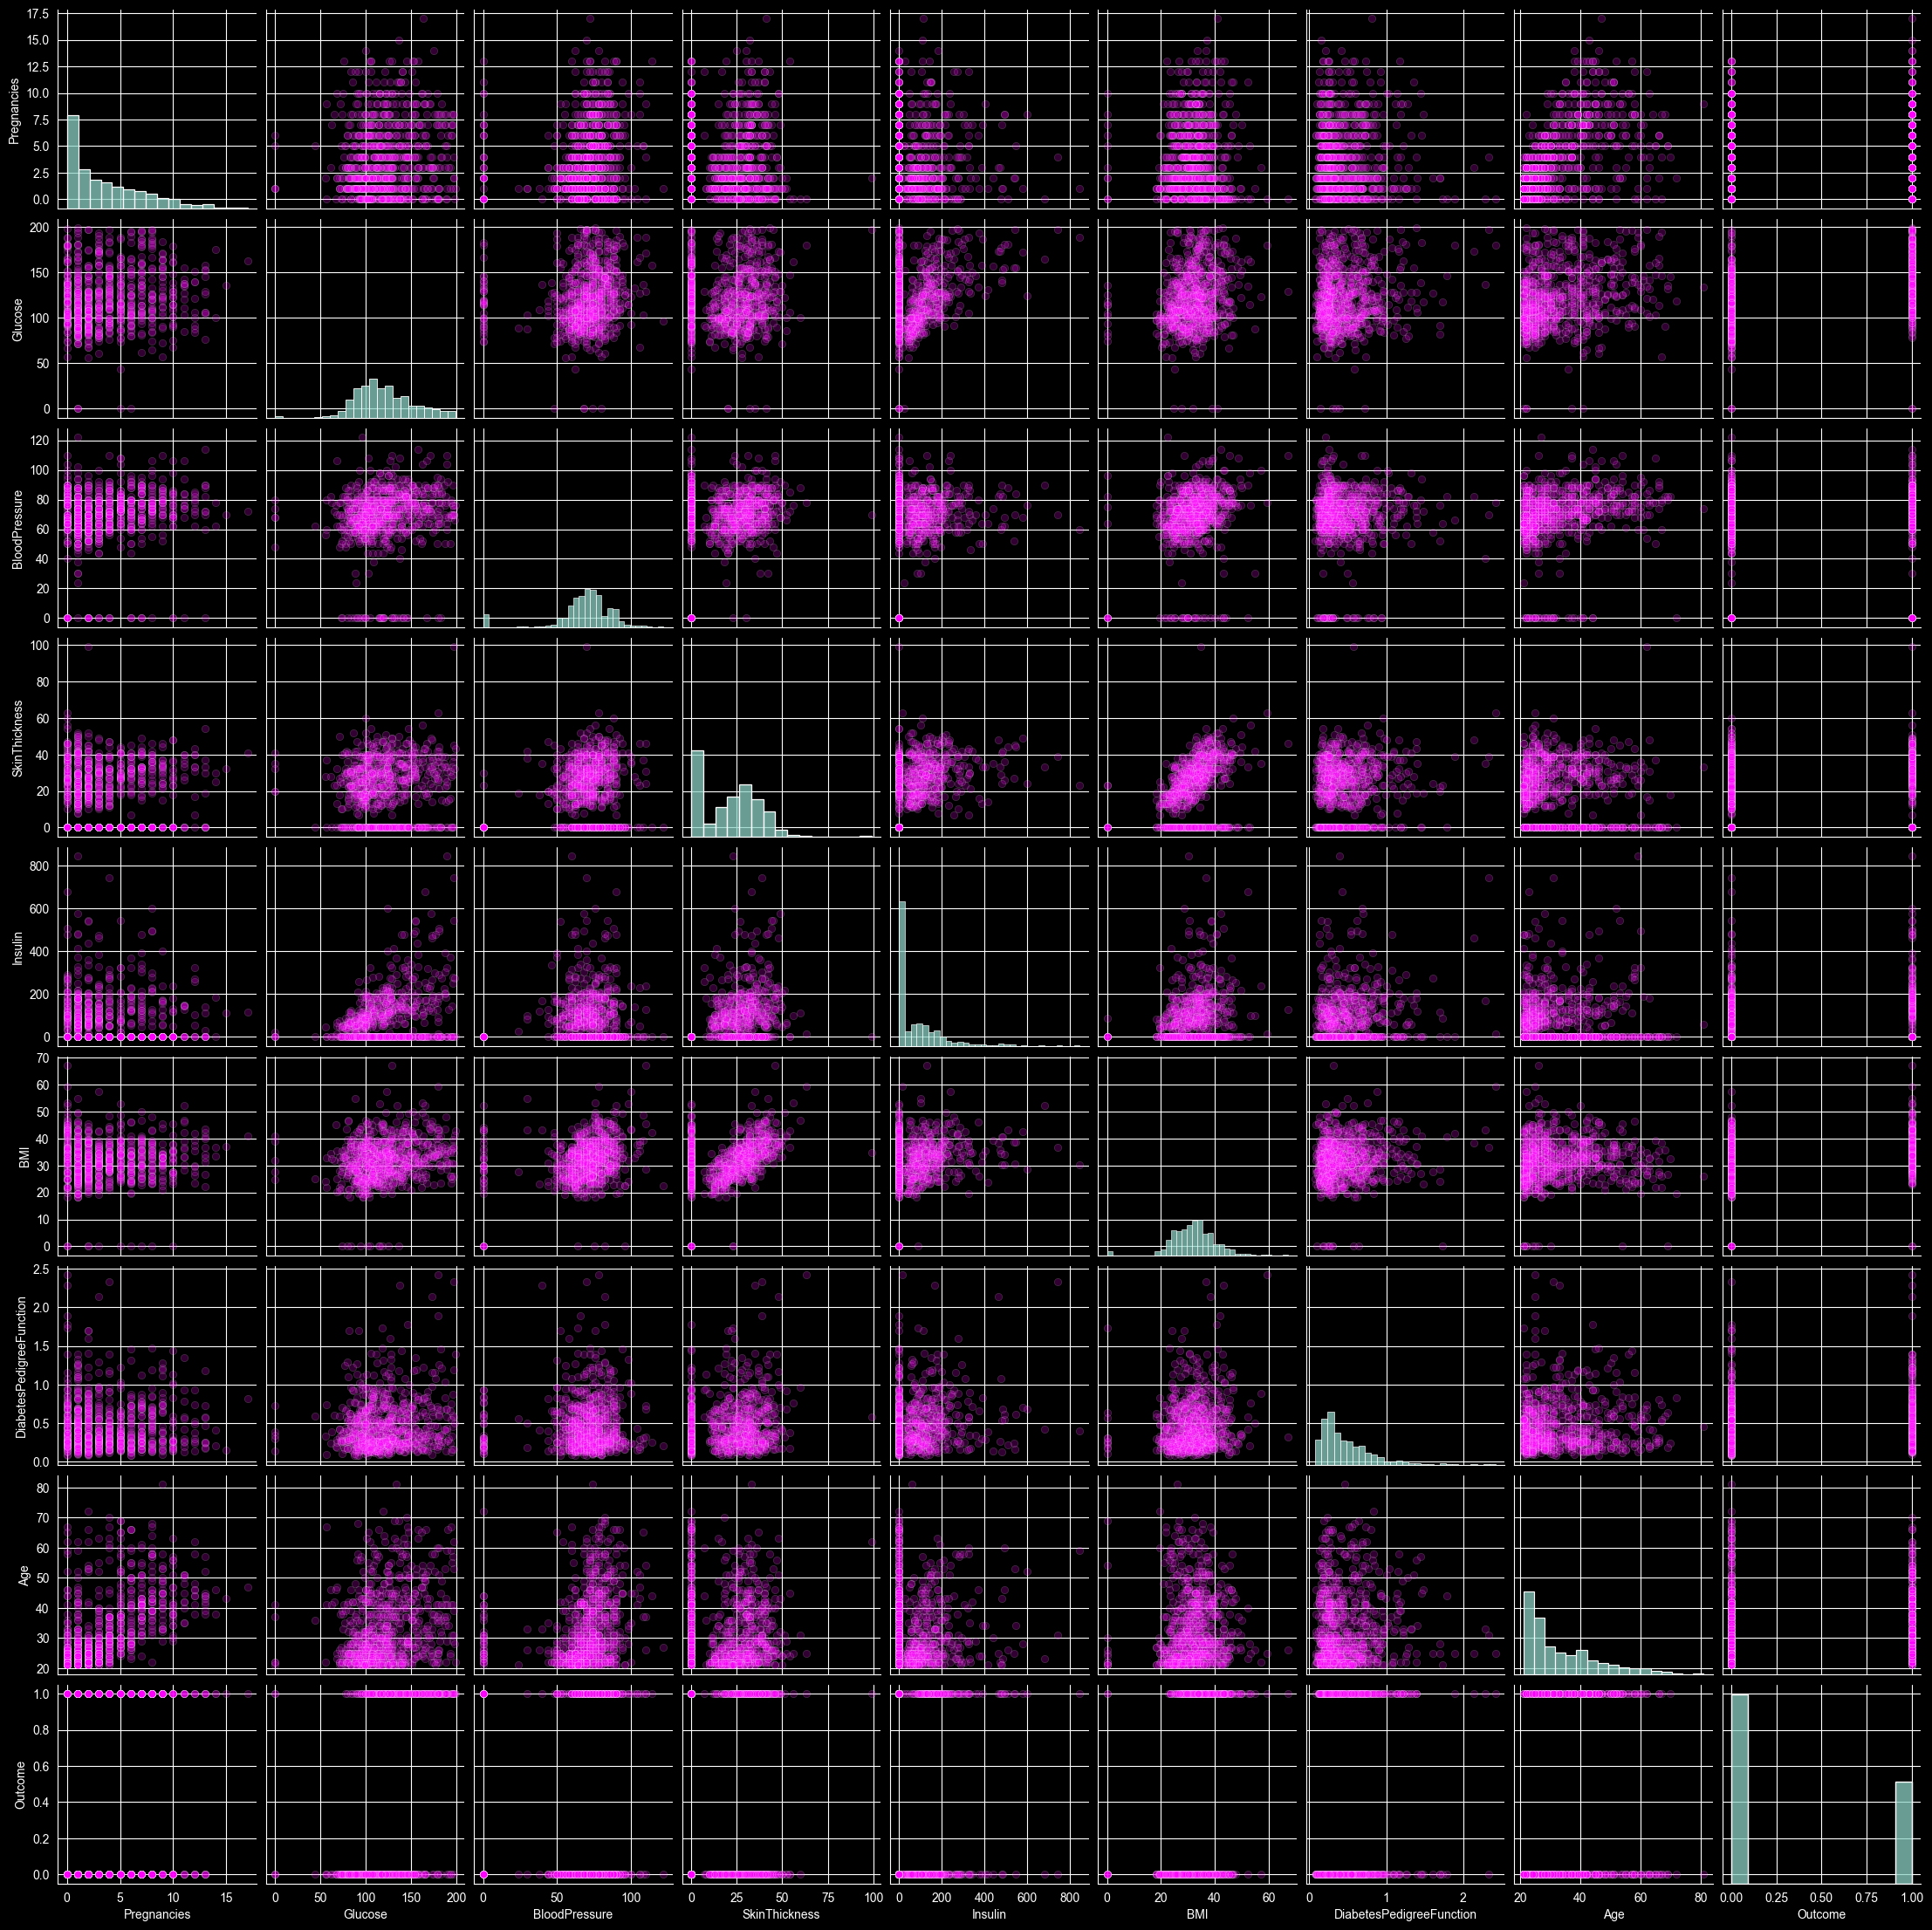

In [131]:
import seaborn as sns
sns.pairplot(df,kind="scatter",plot_kws={"color":"magenta",'alpha' :0.2})

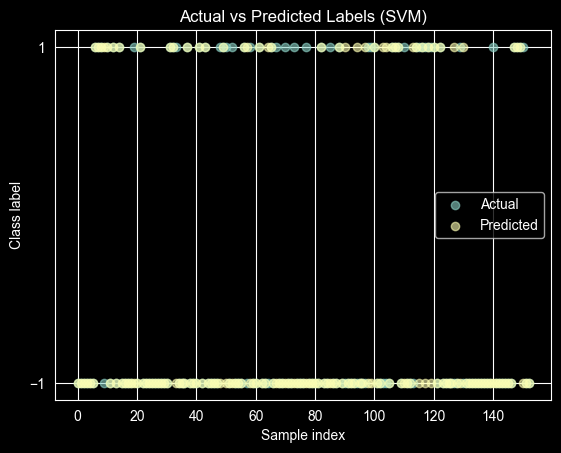

In [132]:
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.6)

plt.yticks([-1, 1])
plt.xlabel("Sample index")
plt.ylabel("Class label")
plt.title("Actual vs Predicted Labels (SVM)")
plt.legend()
plt.show()


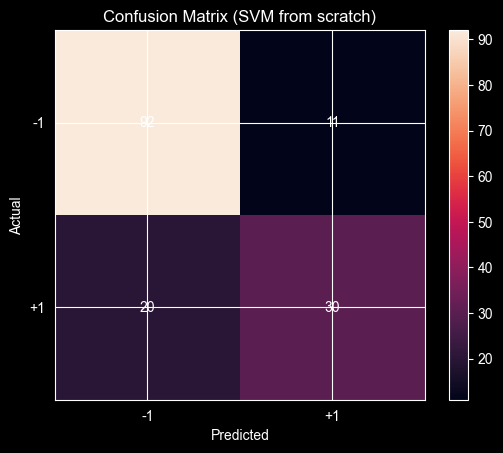

In [133]:
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == -1) & (y_pred == -1))
FP = np.sum((y_test == -1) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == -1))

cm = np.array([[TN, FP],
               [FN, TP]])

plt.imshow(cm)
plt.colorbar()
plt.xticks([0,1], ['-1', '+1'])
plt.yticks([0,1], ['-1', '+1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM from scratch)")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


In [134]:
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == -1) & (y_pred == -1))
FP = np.sum((y_test == -1) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == -1))

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1 = 2 * precision * recall / (precision + recall)
balanced_accuracy = (recall + specificity) / 2

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Balanced Accuracy: {balanced_accuracy:.3f}")


Accuracy: 0.797
Precision: 0.732
Recall: 0.600
Specificity: 0.893
F1 Score: 0.659
Balanced Accuracy: 0.747


In [135]:

preg = float(input("Enter Pregnancies: "))
glucose = float(input("Enter Glucose level: "))
bp = float(input("Enter Blood Pressure: "))
skin = float(input("Enter Skin Thickness: "))
insulin = float(input("Enter Insulin: "))
bmi = float(input("Enter BMI: "))
dpf = float(input("Enter Diabetes Pedigree Function: "))
age = float(input("Enter Age: "))


input_features = np.array([[preg, glucose, bp, skin,
                            insulin, bmi, dpf, age]])


X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

input_scaled = (input_features - X_train_mean) / X_train_std


prediction = clf.predict(input_scaled)
if prediction[0] == 1:
    print("Prediction: Diabetic")
else:
    print("Prediction: Not Diabetic")


Prediction: Diabetic
